In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import numpy.random as rnd
import seaborn as sns
import hiplot as hip

In [2]:
df = pd.read_csv("../data/data.csv")

In [3]:
df.Y.mean()

0.4435

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score

In [5]:
X = df[["A", "B", "C", "G"]]
y = df.Y

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=42)


In [7]:
classifier = RandomForestClassifier(max_depth=4, max_samples=100)

In [8]:
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_samples=100)

In [9]:
pred_train = classifier.predict(X_train)
# confusion_matrix(y_train, pred_train)
print(f"F1: {f1_score(y_train, pred_train)}")
print(f"Accuracy: {accuracy_score(y_train, pred_train)}")
print(f"AUC: {roc_auc_score(y_train, pred_train)}")

F1: 0.676657263751763
Accuracy: 0.738
AUC: 0.7258194016386006


In [10]:
pred_test = classifier.predict(X_test)
print(f"F1: {f1_score(y_test, pred_test)}")
print(f"Accuracy: {accuracy_score(y_test, pred_test)}")
print(f"AUC: {roc_auc_score(y_test, pred_test)}")

F1: 0.6622734761120264
Accuracy: 0.7266666666666667
AUC: 0.7142718257826172


## Hyperparameter Tuning

In [11]:
param_grid = [{
   'max_depth': [2, 5, 10], 
   'max_samples': [100, 500],
   'min_samples_split': [2, 10],
}]
 
classifier = RandomForestClassifier(random_state=11)
    
sh = GridSearchCV(
    classifier, param_grid, 
    cv=5,
    scoring='accuracy',
    verbose=3).fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_depth=2, max_samples=100, min_samples_split=2;, score=0.751 total time=   0.2s
[CV 2/5] END max_depth=2, max_samples=100, min_samples_split=2;, score=0.727 total time=   0.2s
[CV 3/5] END max_depth=2, max_samples=100, min_samples_split=2;, score=0.722 total time=   0.2s
[CV 4/5] END max_depth=2, max_samples=100, min_samples_split=2;, score=0.724 total time=   0.2s
[CV 5/5] END max_depth=2, max_samples=100, min_samples_split=2;, score=0.738 total time=   0.1s
[CV 1/5] END max_depth=2, max_samples=100, min_samples_split=10;, score=0.751 total time=   0.2s
[CV 2/5] END max_depth=2, max_samples=100, min_samples_split=10;, score=0.728 total time=   0.2s
[CV 3/5] END max_depth=2, max_samples=100, min_samples_split=10;, score=0.723 total time=   0.2s
[CV 4/5] END max_depth=2, max_samples=100, min_samples_split=10;, score=0.724 total time=   0.1s
[CV 5/5] END max_depth=2, max_samples=100, min_samples_split=10;, score

In [12]:
results = pd.DataFrame(sh.cv_results_)

In [13]:
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.135997      0.003818         0.015233        0.000867   
1        0.135208      0.000803         0.015531        0.000639   
2        0.145715      0.000641         0.015126        0.000359   
3        0.146957      0.003718         0.014992        0.001023   
4        0.136827      0.002228         0.018521        0.000985   
5        0.138785      0.001568         0.018190        0.000182   
6        0.162784      0.002627         0.019312        0.001278   
7        0.163672      0.000568         0.019048        0.000897   
8        0.139326      0.003712         0.020247        0.000512   
9        0.141563      0.001788         0.019659        0.000417   
10       0.186063      0.001944         0.022901        0.000412   
11       0.181619      0.003463         0.021023        0.001180   

   param_max_depth param_max_samples param_min_samples_split  \
0                2               100                       2   
1                2               100                      10   
2                2               500                       2   
3                2               500                      10   
4                5               100                       2   
5                5               100                      10   
6                5               500                       2   
7                5               500                      10   
8               10               100                       2   
9               10               100                      10   
10              10               500                       2   
11              10               500                      10   

                                               params  split0_test_score  \
0   {'max_depth': 2, 'max_samples': 100, 'min_samp...           0.751429   
1   {'max_depth': 2, 'max_samples': 100, 'min_samp...           0.751429   
2   {'max_depth': 2, 'max_samples': 500, 'min_samp...           0.749286   
3   {'max_depth': 2, 'max_samples': 500, 'min_samp...           0.749286   
4   {'max_depth': 5, 'max_samples': 100, 'min_samp...           0.752857   
5   {'max_depth': 5, 'max_samples': 100, 'min_samp...           0.750714   
6   {'max_depth': 5, 'max_samples': 500, 'min_samp...           0.755000   
7   {'max_depth': 5, 'max_samples': 500, 'min_samp...           0.755714   
8   {'max_depth': 10, 'max_samples': 100, 'min_sam...           0.755714   
9   {'max_depth': 10, 'max_samples': 100, 'min_sam...           0.755000   
10  {'max_depth': 10, 'max_samples': 500, 'min_sam...           0.760000   
11  {'max_depth': 10, 'max_samples': 500, 'min_sam...           0.759286   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.727143           0.722143           0.724286   
1            0.727857           0.722857           0.724286   
2            0.732857           0.721429           0.720000   
3            0.732857           0.721429           0.720000   
4            0.735000           0.730714           0.729286   
5            0.734286           0.733571           0.727143   
6            0.735714           0.730714           0.723571   
7            0.730714           0.730000           0.725714   
8            0.735000           0.727857           0.730714   
9            0.736429           0.727857           0.732143   
10           0.739286           0.730000           0.730000   
11           0.739286           0.732857           0.732143   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
0            0.737857         0.732571        0.010867               10  
1            0.737857         0.732857        0.010662                9  
2            0.735000         0.731714        0.010620               11  
3            0.735000         0.731714        0.010620               11  
4            0.740714         0.737714        0.008552                6  
5            0.740714         0.7

<AxesSubplot:xlabel='param_max_depth', ylabel='mean_test_score'>

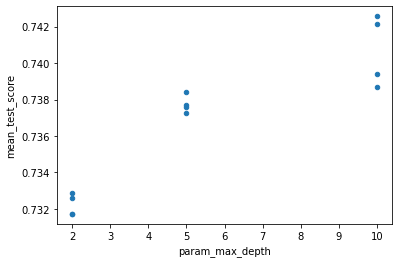

In [14]:
results.plot.scatter(x="param_max_depth", y="mean_test_score")

<AxesSubplot:xlabel='param_max_samples', ylabel='mean_test_score'>

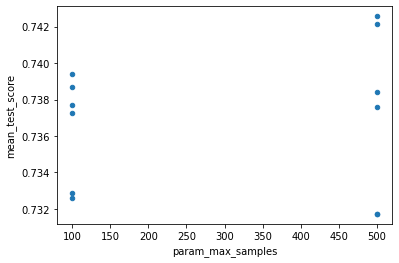

In [15]:
results.plot.scatter(x="param_max_samples", y="mean_test_score")

<AxesSubplot:xlabel='param_min_samples_split', ylabel='mean_test_score'>

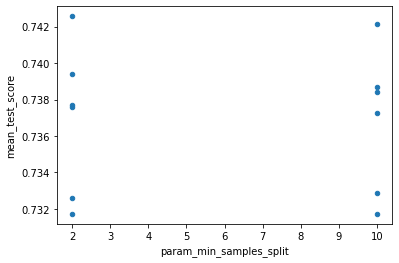

In [16]:
results.plot.scatter(x="param_min_samples_split", y="mean_test_score")

In [18]:
hip.Experiment.from_dataframe(results[["param_max_depth","param_max_samples", "param_min_samples_split", "mean_test_score"]]).display()

<IPython.core.display.Javascript object>